In [12]:
import json

langs = ['en', 'de']
cluster = {}

# with open('./samples/test-logs-2022.txt') as file:
with open('./samples/logs-2022.txt') as file:
    f = "[" + file.read().rstrip("\n").replace("\n", ",") + "]"
    data = json.loads(f)
    
    for item in data:
        if "lang" in item and any(i in item["lang"] for i in langs):
            session = item["session"]
            
            if(session not in cluster): 
                cluster[session] = {
                    "server_error_count": 0,
                    "parsing_count": 0,
                    "max_level": 0,
                    "parsing_results": [],
                    "sessions": []
                }
            # Appends respective session to cluster
            cluster[session]["sessions"].append(item)
            
            # Error Handling
            if "server_error" in item and item["server_error"] != None: 
                cluster[session]["server_error_count"] += 1
                cluster[session]["parsing_results"].append({
                    "level": item["level"],
                    "error": 1
                })
            else:
                cluster[session]["parsing_results"].append({
                    "level": item["level"],
                    "error": 0
                })
            
            # Total Parsing Count
            cluster[session]["parsing_count"] = len(cluster[session]["sessions"])
            
            # Max Level
            max_level = max(cluster[session]["parsing_results"], key=lambda x:x['level'])["level"]
            cluster[session]["max_level"] = max_level

            
results = {}

for i in range(18):
    results[i+1] = {
        "total_error_count": 0,
        "max_level_count": 0,
        "total_tryout_count": 0,
    }

for key, value in cluster.items():
    
    for parsing_result in value["parsing_results"]:
        results[parsing_result["level"]]["total_error_count"] += parsing_result["error"]
        results[parsing_result["level"]]["total_tryout_count"] += 1        
    
    results[value["max_level"]]["max_level_count"] += 1
    
print(json.dumps(results, indent=2))


{
  "1": {
    "total_error_count": 0,
    "max_level_count": 1,
    "total_tryout_count": 1
  },
  "2": {
    "total_error_count": 4,
    "max_level_count": 1,
    "total_tryout_count": 6
  },
  "3": {
    "total_error_count": 0,
    "max_level_count": 0,
    "total_tryout_count": 3
  },
  "4": {
    "total_error_count": 7,
    "max_level_count": 1,
    "total_tryout_count": 17
  },
  "5": {
    "total_error_count": 38,
    "max_level_count": 5,
    "total_tryout_count": 152
  },
  "6": {
    "total_error_count": 207,
    "max_level_count": 28,
    "total_tryout_count": 341
  },
  "7": {
    "total_error_count": 0,
    "max_level_count": 0,
    "total_tryout_count": 0
  },
  "8": {
    "total_error_count": 0,
    "max_level_count": 0,
    "total_tryout_count": 0
  },
  "9": {
    "total_error_count": 0,
    "max_level_count": 0,
    "total_tryout_count": 0
  },
  "10": {
    "total_error_count": 0,
    "max_level_count": 0,
    "total_tryout_count": 0
  },
  "11": {
    "total_error_c

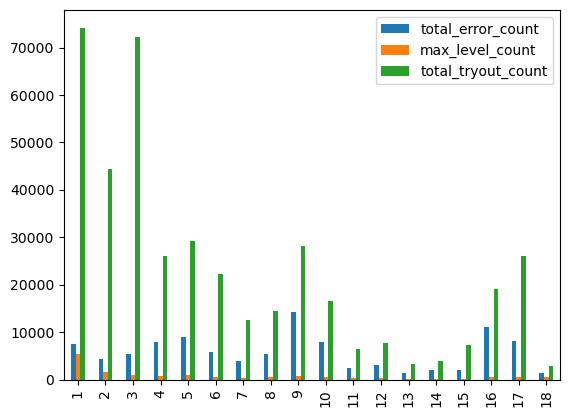

In [11]:
import pandas as pd
import matplotlib.pyplot as plt    

pd.DataFrame(results).T.plot(kind='bar')
plt.show()
